In [1]:
import pymysql
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from pandasql import sqldf
from sklearn import metrics

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv("../../FEATURE_ENGINEER/tablon_undert_57_q5.csv").drop(
    columns=["ID", "DATE_MATCH", "TEAM_HOME", "TEAM_AWAY", "LEAGUE_INGLATERRA", "Unnamed: 0",
            "FAVOURITE_IS_HOME", "LEAGUE_ALEMANIA", "FAVOURITE_IS_AWAY", "LEAGUE_FRANCIA", "LEAGUE_ITALIA",
            "NUM_SAVESAWAY_L45", "AVG_CORNERSAWAY2_L3", "CORNERS_H_45_60", "CORNERS_DANGATTACKS_L45", "CORNERS_A",
            "TEMPERATURE", "NUM_DANGATTACKSAWAY_L45", "NUM_DANGATTACKSHOME_L45", "NUM_FOULSAWAY_L45", "NUM_ATTACKSHOME_L45",
            "NUM_TACKLEHOME_L45", "POSESSION_AWAY_L45", "IS_FAVOURITE_DRAWING", "SUM_GOALS_L60", "AVG_CORNERS_LOSE_AWAY",
            "AVG_CORNERSAWAYR2_L5", "AVG_CORNERSHOME2_L3","AVG_CORNERSHOMER2_L5","CORNERS_A_45_60","AVG_CORNERSHOME1_L3",
            "AVG_CORNERSHOME2_L5", "AVG_CORNERSAWAYR1_L3", "LEAGUE_ESPANA", "GOALS_A",
            "NUM_MATCHESAWAY_POSITIVE_L5", "NUM_SHOTSHOME_L45","WIND","RAIN"], 
    axis=1)

data = data[(data.TOTAL_CORNERS>4) &(data.TOTAL_CORNERS<9)].drop(columns=["TOTAL_CORNERS"],axis=1)

tablon = data[data.YEARMONTH<202109].drop(columns=["YEARMONTH"],axis=1)


X_validation = data[(data.YEARMONTH>=202109) & (data.YEARMONTH<202111)].drop(columns=["YEARMONTH"],axis=1)
y_validation = X_validation.pop("output")


X_validation_november = data[data.YEARMONTH>=202111].drop(columns=["YEARMONTH"],axis=1)
y_validation_november = X_validation_november.pop("output")

In [3]:
len_test = int(round(len(tablon)*0.2, 0))
len_train = int(round(len(tablon)*0.8, 0))

X_train = tablon[len_test:]
y_train = X_train.pop("output")
X_test = tablon[:len_test]
y_test = X_test.pop("output")

In [4]:
X_train.shape, X_test.shape, X_validation.shape

((4183, 56), (1046, 56), (185, 56))

In [5]:
y_train.value_counts()

1    2857
0    1326
Name: output, dtype: int64

In [6]:
y_test.value_counts()

1    655
0    391
Name: output, dtype: int64

In [7]:
y_validation.value_counts()

1    140
0     45
Name: output, dtype: int64

In [8]:
y_validation_november.value_counts()

1    72
0    33
Name: output, dtype: int64

## EXECUTING BEST MODEL

In [88]:
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=6, gamma=1.25, eta=0.015,
                          min_child_weight=30, colsample_bytree=0.65, 
                          random_state=123, eval_metric=["auc", "logloss", "error"])
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-auc:0.50841	validation_0-logloss:0.69183	validation_0-error:0.38145
[1]	validation_0-auc:0.50500	validation_0-logloss:0.69054	validation_0-error:0.37380
[2]	validation_0-auc:0.50574	validation_0-logloss:0.68944	validation_0-error:0.37476
[3]	validation_0-auc:0.50786	validation_0-logloss:0.68820	validation_0-error:0.37380
[4]	validation_0-auc:0.50543	validation_0-logloss:0.68714	validation_0-error:0.37380
[5]	validation_0-auc:0.51679	validation_0-logloss:0.68570	validation_0-error:0.37380
[6]	validation_0-auc:0.51823	validation_0-logloss:0.68456	validation_0-error:0.37285
[7]	validation_0-auc:0.51872	validation_0-logloss:0.68361	validation_0-error:0.37285
[8]	validation_0-auc:0.51658	validation_0-logloss:0.68268	validation_0-error:0.37285
[9]	validation_0-auc:0.51726	validation_0-logloss:0.68177	validation_0-error:0.37285
[10]	validation_0-auc:0.51646	validation_0-logloss:0.68081	validation_0-error:0.37285
[11]	validation_0-auc:0.51161	validation_0-logloss:0.67999	valid

/home/root/opt/python3.7.11/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16]	validation_0-auc:0.52082	validation_0-logloss:0.67606	validation_0-error:0.37285
[17]	validation_0-auc:0.51927	validation_0-logloss:0.67549	validation_0-error:0.37285
[18]	validation_0-auc:0.52054	validation_0-logloss:0.67485	validation_0-error:0.37285
[19]	validation_0-auc:0.52062	validation_0-logloss:0.67432	validation_0-error:0.37380
[20]	validation_0-auc:0.52213	validation_0-logloss:0.67366	validation_0-error:0.37380
[21]	validation_0-auc:0.52208	validation_0-logloss:0.67299	validation_0-error:0.37380
[22]	validation_0-auc:0.52429	validation_0-logloss:0.67227	validation_0-error:0.37380
[23]	validation_0-auc:0.52577	validation_0-logloss:0.67170	validation_0-error:0.37476
[24]	validation_0-auc:0.52650	validation_0-logloss:0.67112	validation_0-error:0.37380
[25]	validation_0-auc:0.52617	validation_0-logloss:0.67056	validation_0-error:0.37380
[26]	validation_0-auc:0.52477	validation_0-logloss:0.67007	validation_0-error:0.37285
[27]	validation_0-auc:0.52581	validation_0-logloss:0.6

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65,
              enable_categorical=False, eta=0.015,
              eval_metric=['auc', 'logloss', 'error'], gamma=1.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.0149999997, max_delta_step=0, max_depth=6,
              min_child_weight=30, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<AxesSubplot:>

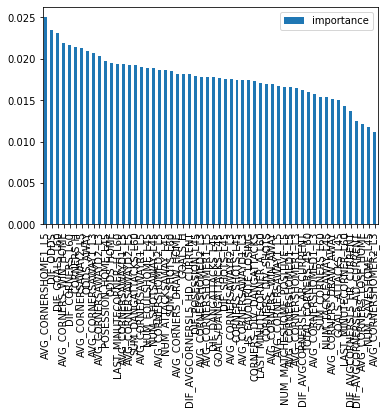

In [89]:
fu_dict = dict(zip(X_train.columns, model.feature_importances_))
fi = pd.DataFrame(fu_dict.values(), index=fu_dict.keys(), columns=["importance"])
fi = fi.sort_values(by="importance", ascending=False)

fi.plot.bar()

In [90]:
y_pred1 = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred1)
cm

array([[  4, 387],
       [  6, 649]])

In [101]:
y_pred_proba = model.predict_proba(X_test)[:,1]
predict_mine = np.where(y_pred_proba > 0.68, 1, 0)
cm1 = confusion_matrix(y_test, predict_mine)

In [102]:
cm1

array([[321,  70],
       [503, 152]])

In [103]:
metrics.accuracy_score(y_test, y_pred1)

0.624282982791587

In [104]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm[0][0]/(cm[1][0]+cm[0][0])

(0.6846846846846847, 0.4)

In [105]:
(cm1[1][1]+cm1[0][1])/len(y_test)*100, (cm[0][0]+cm[1][0])/len(y_test)*100

(21.223709369024856, 0.9560229445506693)

###### VALIDATION - BEST MODEL --> 70% accuracy in 17% of matches

In [106]:
y_pred = model.predict(X_validation)
cm = confusion_matrix(y_validation, y_pred)
cm

array([[  0,  45],
       [  0, 140]])

In [107]:
metrics.accuracy_score(y_validation, y_pred)

0.7567567567567568

In [108]:
y_pred_proba = model.predict_proba(X_validation)[:,1]
predict_mine = np.where(y_pred_proba > 0.68, 1, 0)
cm1 = confusion_matrix(y_validation, predict_mine)

In [109]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm[0][0]/(cm[1][0]+cm[0][0])

/home/root/opt/python3.7.11/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


(0.85, nan)

In [110]:
(cm1[1][1]+cm1[0][1])/len(y_validation)*100, (cm[0][0]+cm[1][0])/len(y_validation)*100

(21.62162162162162, 0.0)

In [111]:
cm1

array([[ 39,   6],
       [106,  34]])

## FINAL VALIDATION - NOVEMBER 2021

In [112]:
y_pred = model.predict(X_validation_november)
cm = confusion_matrix(y_validation_november, y_pred)
cm

array([[ 0, 33],
       [ 0, 72]])

In [113]:
metrics.accuracy_score(y_validation_november, y_pred)

0.6857142857142857

In [114]:
y_pred_proba = model.predict_proba(X_validation_november)[:,1]
predict_mine = np.where(y_pred_proba > 0.68, 1, 0)
cm1 = confusion_matrix(y_validation_november, predict_mine)

In [115]:
cm1

array([[29,  4],
       [57, 15]])

In [116]:
cm1[1][1]/(cm1[1][1]+cm1[0][1]), cm[0][0]/(cm[1][0]+cm[0][0])

/home/root/opt/python3.7.11/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


(0.7894736842105263, nan)

In [117]:
(cm1[1][1]+cm1[0][1])/len(y_validation_november)*100, (cm[0][0]+cm[1][0])/len(y_validation_november)*100

(18.095238095238095, 0.0)

In [118]:
#umbral --> 0.68; Condition --> TOTAL_CORNERS > 3
import pickle
file_name = "model_under5_58.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
#xgb_model_loaded = pickle.load(open(file_name, "rb"))


# OUTPUT

In [130]:
output = data[(data.YEARMONTH>=202111 )& (data.TOTAL_CORNERS>3)][["ID", "output", "CORNERS_H", "CORNERS_A", "TOTAL_CORNERS"]].reset_index(drop=True)

In [131]:
output["PROB_CORNERS"] = pd.DataFrame(model.predict_proba(X_validation_november)[:,1]).iloc[:, 0]\
    .apply(lambda x: 1 if x>0.6 else 0)

In [132]:
output[output.PROB_CORNERS==1]

,ID,output,CORNERS_H,CORNERS_A,TOTAL_CORNERS,PROB_CORNERS
0,E30fSmrc,1,5,0,5,1
1,nsYoAO57,1,5,1,6,1
2,p0AwSvlE,1,4,4,8,1
7,Oj9sRb3K,1,4,3,7,1
8,dCFxXoDK,1,2,4,6,1
9,vyLXXRcE,1,4,2,6,1
14,80vLFh5r,0,2,5,7,1
15,fZaDLxRs,0,1,7,8,1
16,ID8oQIIQ,1,5,1,6,1
17,GllMJGef,1,5,4,9,1
